(100, 4, 4)


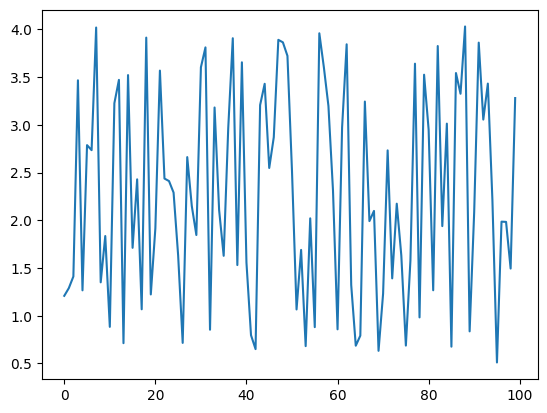

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
path = os.path.abspath(r'C:\Stuff\Dataset-creation\lego_poses_train.npy')
a = np.load(path)
print(a.shape)
a[:, 2, 3]
plt.plot(a[:, 2, 3])

In [13]:
column_values = a[:, 2, 3]
sorted_indices = np.argsort(column_values)
batches = np.array_split(sorted_indices, 10)
for batch in batches:
    print(batch)


[95 69 42 85 53 64 75 13 26 65]
[41 89 32 60 55 10 78 51 17  0]
[19 70  4 81  1 63  8 72  2 98]
[38 40 76 35 74 25 52 15  9 29]
[20 83 97 96 67 54 90 68 34 28]
[73 94 24 59 23 16 22 50 45 27]
[71  6  5 46 80 36 61 84 92 33]
[58 43 11 66 99 87 44 93  3 12]
[14 79 86 21 57 30 77 39 49 31]
[82 62 91 48 47 37 18 56  7 88]


In [54]:
import os
import json
import re

directory = r'C:\Stuff\Dataset-creation\data_lego\lego-range'
sorted_array = sorted(os.listdir(directory), key=lambda x: int(x.split('-')[-1]))
folder_frames = []
for i, folder in enumerate(sorted_array):
    frames = []
    folder_path = os.path.join(directory, folder)
    json_file = os.path.join(folder_path, 'transforms_train.json')
    with open(json_file, 'r') as f:
        data = json.load(f)
        for frame in data['frames']:
            name_image = frame['file_path']
            integer = re.findall(r'\d+', name_image)[-1]
            integer = int(integer)
            if integer in batches[i]:
                frames.append(frame)
    data['frames'] = frames
    with open(json_file, "w") as jsonFile:
        json.dump(data, jsonFile, indent=4)                    
    folder_frames.append(frames)
            
                                


In [48]:
folder_frames[0]

[{'file_path': './train/r_13',
  'rotation': 0.012566370614359171,
  'transform_matrix': [[0.842908501625061,
    -0.09502744674682617,
    0.5295989513397217,
    2.1348819732666016],
   [0.5380570292472839,
    0.14886793494224548,
    -0.8296582698822021,
    -3.3444597721099854],
   [7.450582373280668e-09,
    0.9842804074287415,
    0.17661221325397491,
    0.7119466662406921],
   [0.0, 0.0, 0.0, 1.0]]},
 {'file_path': './train/r_26',
  'rotation': 0.012566370614359171,
  'transform_matrix': [[-0.9752575159072876,
    -0.03920060396194458,
    0.21756872534751892,
    0.8770476579666138],
   [0.22107206284999847,
    -0.17293314635753632,
    0.9598026275634766,
    3.8690884113311768],
   [3.725290742551124e-09,
    0.9841530919075012,
    0.1773204803466797,
    0.7148017883300781],
   [0.0, 0.0, 0.0, 1.0]]},
 {'file_path': './train/r_42',
  'rotation': 0.012566370614359171,
  'transform_matrix': [[-0.9928660988807678,
    -0.019224023446440697,
    0.11767476797103882,
    0.47

In [18]:
# import matplotlib.pyplot as plt
# import os
# import cv2

# # Folder containing images
# images_folder = r'C:\Stuff\Dataset-creation\data_lego\lego\train'
# names = [f'r_{index}.png' for index in batches[0]]
# selected_image_files = [os.path.join(images_folder, name) for name in names]

# fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# for i, img_path in enumerate(selected_image_files):
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

#     ax = axes[i // 4, i % 4]
#     ax.imshow(img)
#     ax.set_title(f'Image {selected_indices[i]}')
#     ax.axis('off')

# plt.tight_layout()
# plt.show()
